# Week 2: Neural Networks
#### Done by: Nigel Wee

# Problem 1
# a) Build a CNN to classify the CIFAR-10 dataset: To build a CNN for the CIFAR10 dataset, you can use the Keras library in Python, similar to the code we used for the MNIST dataset during the code-along. (15)
used for the MNIST dataset during the code-along. (15)

In [1]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10  # Import CIFAR-10 dataset

# Load CIFAR-10 data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

%matplotlib inline

In [2]:
# Check one value of X_train.
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [3]:
# Check shape of an image.
X_train[0].shape

(32, 32, 3)

# CIFAR-10 dataset also uses pixel values ranging from 0 to 255. However, each pixel has 3 values representing RGB compared to the singular value representing black and white of MNIST dataset.
# Scaling of pixel values is done, resulting in values between 0 to 1.

In [4]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255

In [5]:
# Check shape of full training data.
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

# In the case of CIFAR-10, each image are 32 x 32 x 3 rather than 28 x 28 x 1 of MNIST dataset.

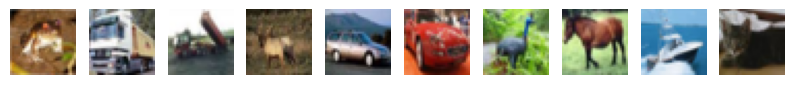

In [7]:
# Display the first 10 images from X_train
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')  # Turn off axis labels
plt.show()

In [8]:
# Reshape each image to be 32 x 32 x 3.
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [9]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

# One-hot encode y values

In [10]:
# one hot encode target values
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# FFNN

In [12]:
model = Sequential()

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128, activation='relu'))

In [15]:
model.add(Dense(32, activation='relu'))

In [16]:
model.add(Dense(10, activation='softmax'))

In [17]:
# Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
# Fit model on training data.
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    verbose=1)

Epoch 1/5
196/196 [==============================] - 2s 8ms/step - loss: 1.9921 - accuracy: 0.2855 - val_loss: 1.8387 - val_accuracy: 0.3461
Epoch 2/5
196/196 [==============================] - 1s 7ms/step - loss: 1.8103 - accuracy: 0.3585 - val_loss: 1.8019 - val_accuracy: 0.3525
Epoch 3/5
196/196 [==============================] - 1s 7ms/step - loss: 1.7445 - accuracy: 0.3811 - val_loss: 1.7331 - val_accuracy: 0.3859
Epoch 4/5
196/196 [==============================] - 1s 7ms/step - loss: 1.6988 - accuracy: 0.3976 - val_loss: 1.6703 - val_accuracy: 0.4094
Epoch 5/5
196/196 [==============================] - 1s 6ms/step - loss: 1.6612 - accuracy: 0.4086 - val_loss: 1.6758 - val_accuracy: 0.3948


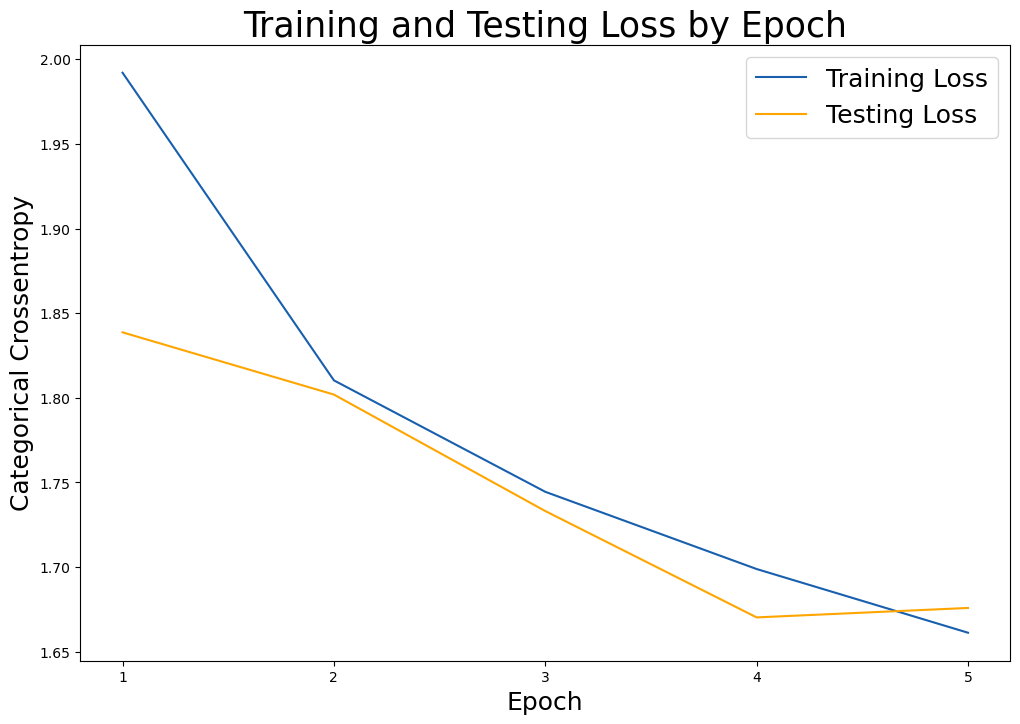

In [19]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [20]:
# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

313/313 [==============================] - 0s 802us/step - loss: 1.6758 - accuracy: 0.3948


In [21]:
# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

loss: 1.6758402585983276
accuracy: 0.39480000734329224


In [22]:
# Check out the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________


# CNN

In [23]:
# Instantiate a CNN.
cnn_model = Sequential()

In [24]:
# Add a convolutional layer.
cnn_model.add(Conv2D(filters = 6,            # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(32,32,3))) # shape of input (image)

In [25]:
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

In [26]:
cnn_model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu'))

In [27]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
cnn_model.add(Flatten())

In [29]:
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

In [30]:
# Add a final layer with 10 neurons.
cnn_model.add(Dense(10, activation='softmax'))

In [31]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [32]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=5,
                        verbose=1)

Epoch 1/5
196/196 [==============================] - 6s 27ms/step - loss: 1.7784 - accuracy: 0.3574 - val_loss: 1.5808 - val_accuracy: 0.4304
Epoch 2/5
196/196 [==============================] - 5s 27ms/step - loss: 1.4965 - accuracy: 0.4655 - val_loss: 1.4236 - val_accuracy: 0.4937
Epoch 3/5
196/196 [==============================] - 5s 27ms/step - loss: 1.3810 - accuracy: 0.5087 - val_loss: 1.3552 - val_accuracy: 0.5148
Epoch 4/5
196/196 [==============================] - 5s 28ms/step - loss: 1.3085 - accuracy: 0.5366 - val_loss: 1.2911 - val_accuracy: 0.5444
Epoch 5/5
196/196 [==============================] - 5s 28ms/step - loss: 1.2483 - accuracy: 0.5613 - val_loss: 1.2667 - val_accuracy: 0.5472


In [33]:
# Check out the model summary.
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

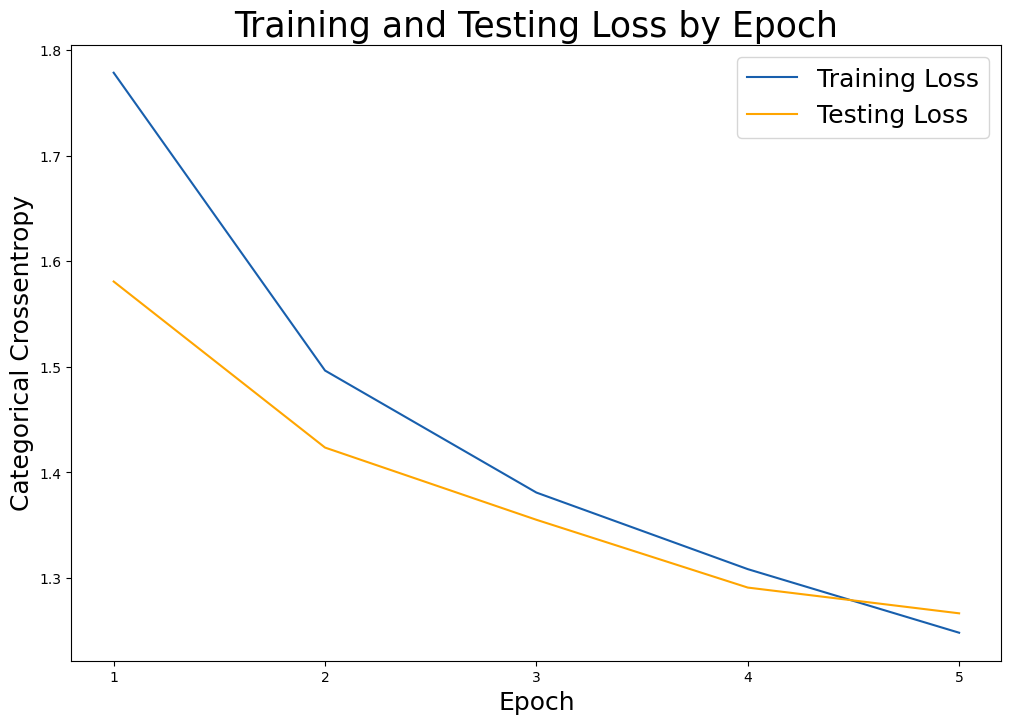

In [34]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize = 18);

In [35]:
# Evaluate model on test data.
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

313/313 [==============================] - 1s 3ms/step - loss: 1.2667 - accuracy: 0.5472


In [36]:
# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

CNN loss  : 1.2666726112365723
CNN accuracy   : 0.5472000241279602

FFNN loss : 1.6758402585983276
FFNN accuracy  : 0.39480000734329224


# b) Explain the neural network architecture listing in detail how many hidden layers, how many neurons and what activation functions did you use. Ensure that you choose an appropriate metrics to demonstrate the learning rate and how well your model has performed. (10)

In [37]:
# Check out the model summary.
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_3 (Dense)             (None, 128)              

# Therefore, there is a total of `7` defined hidden layers.
# In the dense layers: `dense_9` and `dense_10`. There are `128` and `10` neurons respectively as defined above previously. 10 neurons are used for the final layer as the multiclass problem has a total possible output of 10 different cases: `airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck`. 
# Activation functions that were used were `ReLU` for the convolutional layers and densely-connected layer: `conv2d_9`, `conv2d_10`, and `dense_9`.
# and `softmax` for the final layer: `dense_10`. Softmax is used for the final layer as this is a `multiclass classification` problem afterall.

CNN defined above:

cnn_model.add(Conv2D(filters = 6, # number of filters
                     
                     kernel_size = 3, # height/width of filter
                     
                     activation='relu', # activation function
                     
                     input_shape=(32,32,3))) # shape of input (image)


cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

cnn_model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(10, activation='softmax'))

In [38]:
# Get the optimizer object from the model
optimizer = cnn_model.optimizer

# Get the learning rate from the optimizer
learning_rate = optimizer.lr.numpy()  # For TensorFlow 2.x

# Print or log the learning rate
print("Learning rate:", learning_rate)

Learning rate: 0.001


# In this case, the `Adam` optimiser has a predefined learning rate of `0.001`.

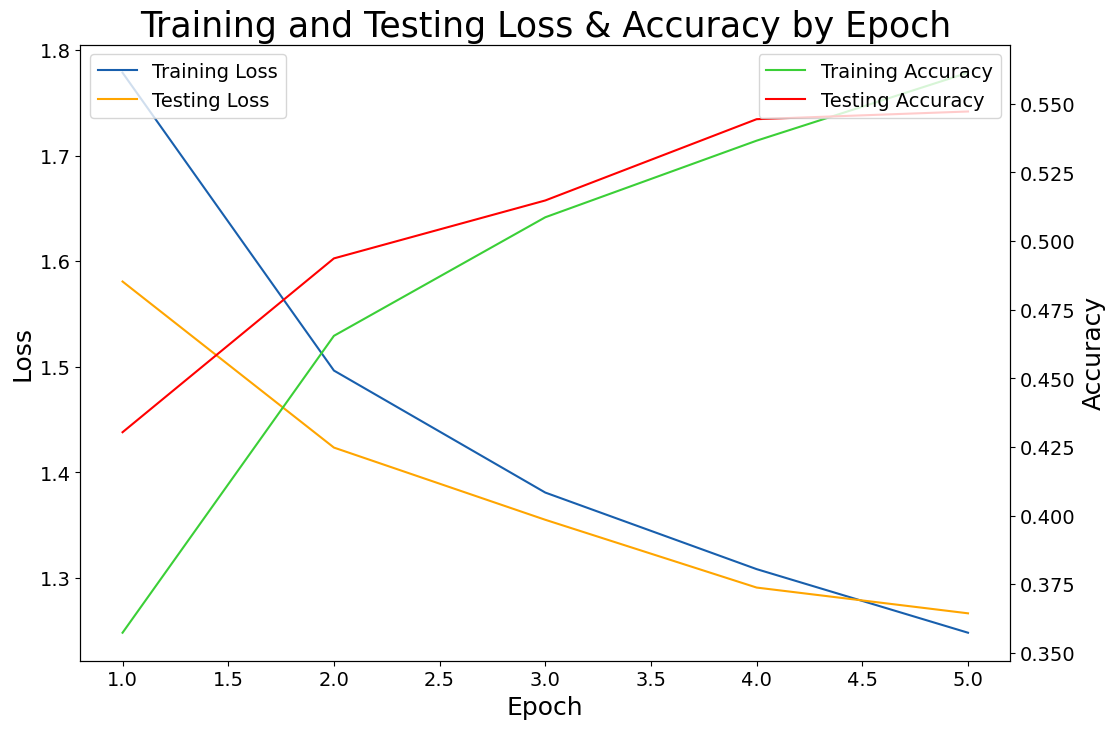

In [39]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Set figure size.
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot training and testing loss on primary y-axis (left).
ax1.plot(epochs, train_loss, label='Training Loss', color='#185fad')
ax1.plot(epochs, test_loss, label='Testing Loss', color='orange')
ax1.set_ylabel('Loss', fontsize=18)
ax1.set_xlabel('Epoch', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend(fontsize=14, loc='upper left')

# Create a secondary y-axis for accuracy on the right.
ax2 = ax1.twinx()
ax2.plot(epochs, train_accuracy, label='Training Accuracy', color='#3BCF37')
ax2.plot(epochs, test_accuracy, label='Testing Accuracy', color='red')
ax2.set_ylabel('Accuracy', fontsize=18)
ax2.tick_params(axis='y', which='major', labelsize=14)
ax2.legend(fontsize=14, loc='upper right')

# Set title
plt.title('Training and Testing Loss & Accuracy by Epoch', fontsize=25)

# Show plot.
plt.show()


# Therefore, the model's performance metrics of both `loss function` and `accuracy` are seen to be improving (decreasing and increasing respectively) over the 5 epochs.
# This is true for both the training and more importantly the testing set. 
# If the performance of the training set is improving but the testing set is degrading. This could mean that `overfitting` of the model is occurring for those epochs.

# Comparing CNN against FFNN

In [40]:
# Evaluate model on test data.
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

313/313 [==============================] - 1s 2ms/step - loss: 1.2667 - accuracy: 0.5472


In [41]:
# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

CNN loss  : 1.2666726112365723
CNN accuracy   : 0.5472000241279602

FFNN loss : 1.6758402585983276
FFNN accuracy  : 0.39480000734329224


# The performance metrics of the CNN model shows both a `higher accuracy` and `lower loss function` (in this case, categorical crossentropy) than the FFNN model (0.54 vs.0.39 and 1.27 vs.1.67 respectively).

# Problem 2
# a) Visualise the learned features of the CNN: Use the filters learned by the convolutional layers of the CNN to visualize the features learned by the network. Plot some of the filters as images, and visualize the activation maps produced by the filters for some example input images. (15)

In [42]:
# summarize filters in each convolutional layer
# summarize filter shapes
for layer in cnn_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 3, 6)
conv2d_1 (3, 3, 6, 16)


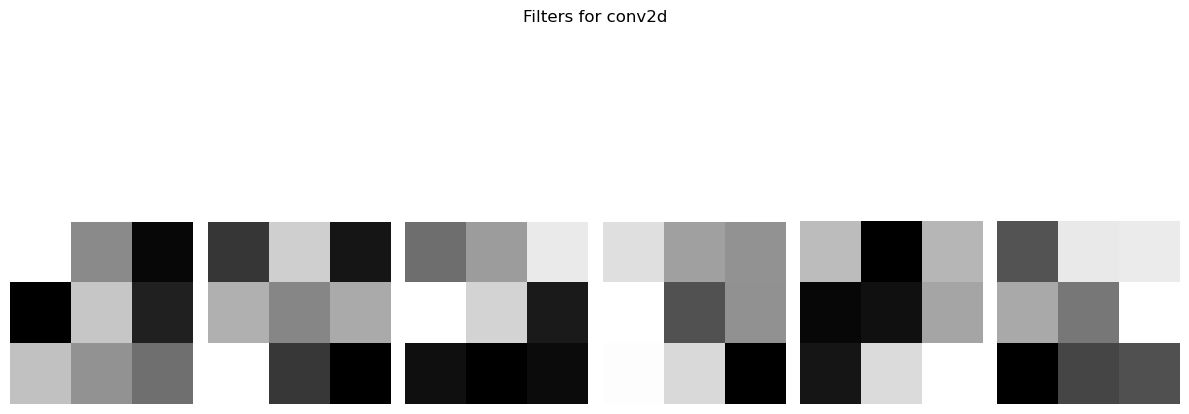

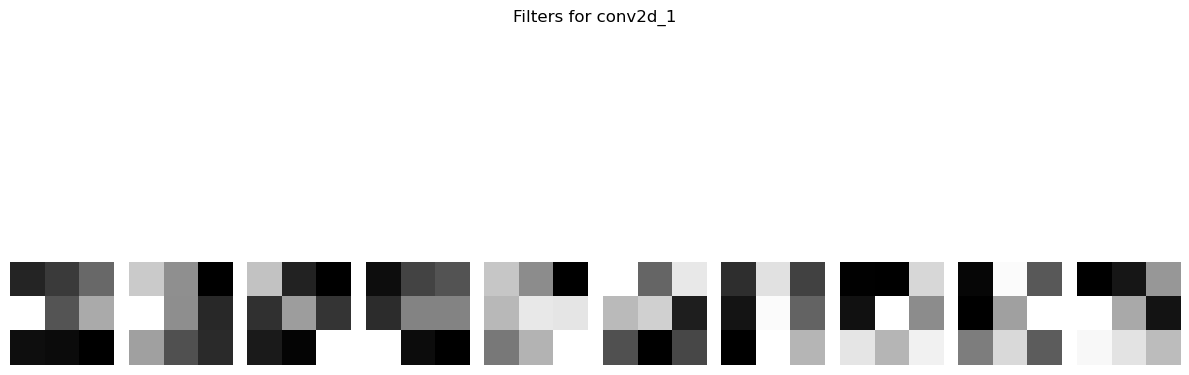

In [43]:
# Loop through all layers in the model
for layer in cnn_model.layers:
    # Check if the layer is a convolutional layer
    if 'conv' in layer.name:
        # Get filter weights
        filters, biases = layer.get_weights()
        # Normalize filter values to 0-1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)

        # Plot some of the filters
        num_filters_to_plot = min(10, filters.shape[-1])  # Plot up to 10 filters
        fig, axs = plt.subplots(1, num_filters_to_plot, figsize=(12, 6))

        for i in range(num_filters_to_plot):
            f = filters[:, :, :, i]
            axs[i].imshow(f[:, :, 0], cmap='gray')  # Plot only the first channel
            axs[i].axis('off')

        plt.suptitle(f'Filters for {layer.name}')
        plt.tight_layout()
        plt.show()

In [44]:
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = cnn_model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 30, 30, 6)
2 conv2d_1 (None, 13, 13, 16)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 54ms/step


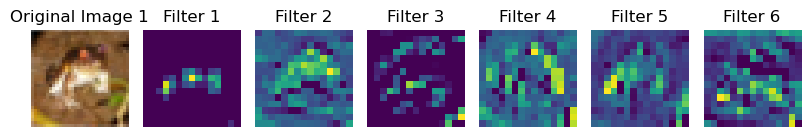

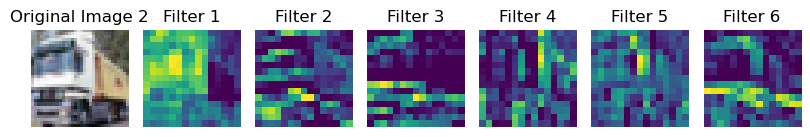

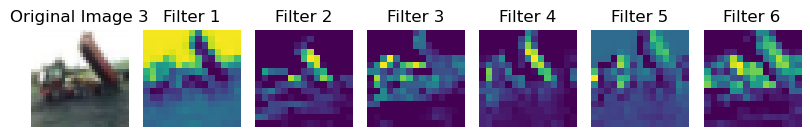

In [45]:
from keras.models import Model  # Add this import statement

# Redefine model to output right after the first hidden layer
model = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[1].output)
model.summary()

# Select example images from the CIFAR-10 train set
example_images = X_train[:3]
# Reshape the images to match the input shape expected by the model
example_images = example_images.reshape((-1, 32, 32, 3))

# Get activation maps for the first hidden layer
activation_maps = model.predict(example_images)

# Plot the original images and all activation maps for each example image
for i in range(len(example_images)):
    # Plot original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, activation_maps.shape[-1] + 1, 1)  # Additional subplot for the original image
    plt.imshow(example_images[i])
    plt.axis('off')
    plt.title(f'Original Image {i+1}')

    # Plot activation maps for each filter
    for j in range(activation_maps.shape[-1]):
        plt.subplot(1, activation_maps.shape[-1] + 1, j + 2)  # Start from the second subplot
        plt.imshow(activation_maps[i, :, :, j], cmap='viridis')
        plt.axis('off')
        plt.title(f'Filter {j+1}')

    plt.tight_layout()
    plt.show()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 6)         168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 16)        880       
                                                                 
Total params: 1,048
Trainable params: 1,048
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 33ms/step


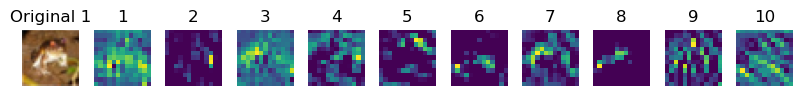

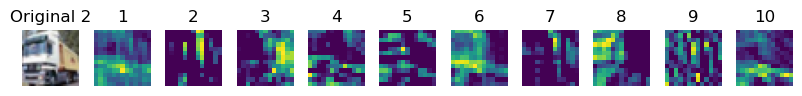

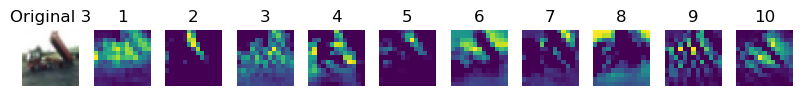

In [46]:
# Redefine model to output right after the desired layer
layer_index = 2  # Change this to the index of the desired layer
model = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[layer_index].output)
model.summary()

# Select example images from the CIFAR-10 train set
example_images = X_train[:3]
# Reshape the images to match the input shape expected by the model
example_images = example_images.reshape((-1, 32, 32, 3))

# Get activation maps for the desired layer
activation_maps = model.predict(example_images)

# Plot the original images and up to 10 activation maps for each example image
for i in range(len(example_images)):
    # Plot original image
    plt.figure(figsize=(8, 4))
    plt.subplot(1, min(activation_maps.shape[-1], 10) + 1, 1)  # Additional subplot for the original image
    plt.imshow(example_images[i])
    plt.axis('off')
    plt.title(f'Original {i+1}')

    # Plot up to 10 activation maps for each filter
    for j in range(min(activation_maps.shape[-1], 10)):
        plt.subplot(1, min(activation_maps.shape[-1], 10) + 1, j + 2)  # Start from the second subplot
        plt.imshow(activation_maps[i, :, :, j], cmap='viridis')
        plt.axis('off')
        plt.title(f'{j+1}')

    plt.tight_layout()
    plt.show()

# b) Interpret the learned features and discuss their relationship to the input images and the classification task. (10)

# Generally, the learnt features capture the `edges, textures, and patterns` of the input images. Essentially extracting `basic visual patterns`. Therefore, the learnt features reflect the `characteristics of the input images` that are relevant for the classification task. This concept is similar to functional group identification using characteristic peaks seen in FTIR spectra.
# Furthermore, another observation could be made that the `lower layers` potentially capture `low-level features` like edges, textures, and patterns 
# While `deeper layers` capture more `abstract and high-level features`, representing combinations of lower-level features.

# Let's take for example the image of the frog, the first convolutional layer captures the general shape of a frog while the second convolutional layer captures rather abstract patterns within the image that are less clear to discern out. 

# Problem 3
# a) Implement data augmentation: Data augmentation is a technique used to increase the size of the training dataset by applying random transformations to the input images, such as rotations, translations, and zooms. Implement data augmentation using the ‘ImageDataGenerator’ class in Keras, and retrain the CNN on the augmented dataset. Explain your augmentations. (15)

In [47]:
from keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Define the data generator for augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=True,  # randomly flip images vertically
    rotation_range=20,  # randomly rotate images
    zoom_range=0.1,  # randomly zoom into images
    brightness_range=[0.7, 1.3],  # randomly adjust brightness (range from 0.7 to 1.3)
    fill_mode='nearest'  # fill mode for filling in newly created pixels
)

# Fit the data generator on the CIFAR-10 train dataset
datagen.fit(X_train)

# Create an iterator for the augmented data with batch size 1 for visualization
augmented_iterator = datagen.flow(X_train, y_train, batch_size=1, shuffle=False)

# Create lists to store augmented images and labels
augmented_images = []
augmented_labels = []

# Generate augmented images and labels for all images in the training set
num_augmentations = 3  # Number of augmentations per image
for _ in range(len(X_train) * num_augmentations):
    augmented_image, augmented_label = augmented_iterator.next()
    augmented_images.append(augmented_image)
    augmented_labels.append(augmented_label)

# Convert list to numpy array
augmented_images = np.array(augmented_images).reshape(-1, 32, 32, 3)
augmented_labels = np.array(augmented_labels).reshape(-1)

# Calculate the new total number of images in the training set
new_train_size = len(X_train) + len(augmented_images)
print(f"Original Training Set Size: {len(X_train)} samples")
print(f"New Training Set Size (including augmented images): {new_train_size} samples")


Original Training Set Size: 50000 samples
New Training Set Size (including augmented images): 200000 samples


# Data augmentation is done in the form of `horizontal/vertical shift`, `horizontal/vertical flip`, `random rotation`, ` random zoom`, and `brightness`. These slight changes to the original image allow the dataset to be increased without the implications of overfitting. In this case, there are 3 augmentations done per image each with a mixture of the factors listed above.

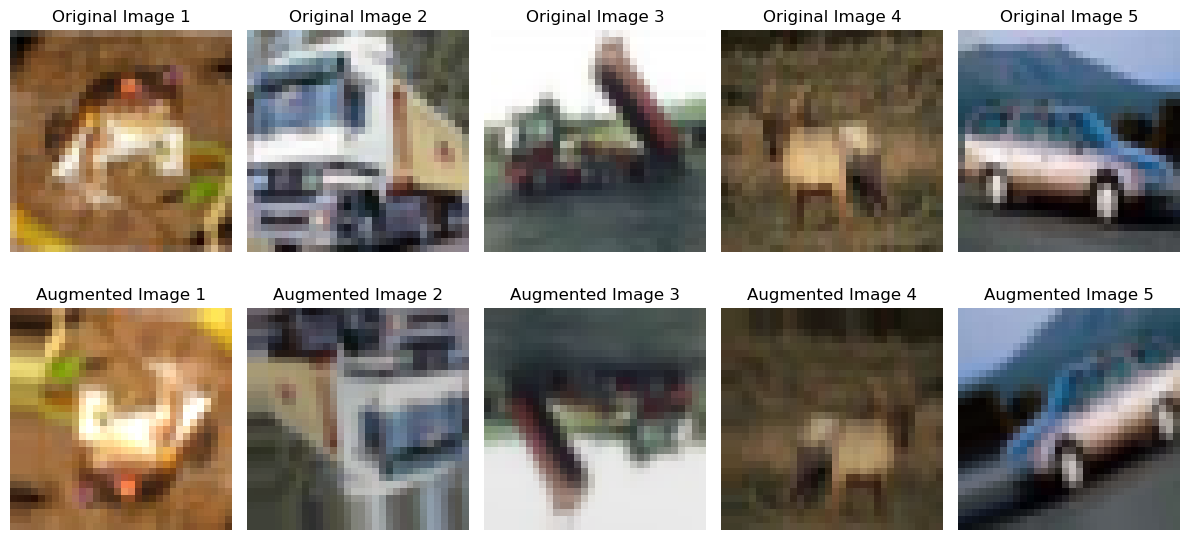

In [48]:
# Plot the first 5 images from the original dataset
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.axis('off')
    plt.title(f'Original Image {i + 1}')

# Plot the first 5 images from the augmented dataset
for i in range(5):
    plt.subplot(2, 5, i + 6)
    plt.imshow(augmented_images[i].astype('uint8'))
    plt.axis('off')
    plt.title(f'Augmented Image {i + 1}')

plt.tight_layout()
plt.show()

In [49]:
augmented_labels = augmented_labels.reshape(-1, 1)

In [50]:
# Combine the original dataset and the augmented dataset for X_train and y_train
combined_X_train = np.concatenate((X_train, augmented_images), axis=0)
combined_y_train = np.concatenate((y_train, augmented_labels), axis=0)

# Verify the size of the combined dataset
print(f"Combined Training Set Size: {combined_X_train.shape[0]} samples")

Combined Training Set Size: 200000 samples


In [51]:
combined_X_train.shape

(200000, 32, 32, 3)

In [52]:
combined_y_train.shape

(200000, 1)

In [53]:
combined_X_train[0]

array([[[ 59.,  62.,  63.],
        [ 43.,  46.,  45.],
        [ 50.,  48.,  43.],
        ...,
        [158., 132., 108.],
        [152., 125., 102.],
        [148., 124., 103.]],

       [[ 16.,  20.,  20.],
        [  0.,   0.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [123.,  88.,  55.],
        [119.,  83.,  50.],
        [122.,  87.,  57.]],

       [[ 25.,  24.,  21.],
        [ 16.,   7.,   0.],
        [ 49.,  27.,   8.],
        ...,
        [118.,  84.,  50.],
        [120.,  84.,  50.],
        [109.,  73.,  42.]],

       ...,

       [[208., 170.,  96.],
        [201., 153.,  34.],
        [198., 161.,  26.],
        ...,
        [160., 133.,  70.],
        [ 56.,  31.,   7.],
        [ 53.,  34.,  20.]],

       [[180., 139.,  96.],
        [173., 123.,  42.],
        [186., 144.,  30.],
        ...,
        [184., 148.,  94.],
        [ 97.,  62.,  34.],
        [ 83.,  53.,  34.]],

       [[177., 144., 116.],
        [168., 129.,  94.],
        [179., 1

In [54]:
# Check shape of an image.
combined_X_train[0].shape

(32, 32, 3)

In [55]:
combined_X_train = combined_X_train.astype('float32')
combined_X_train /= 255

In [56]:
# Check shape of full training data.
combined_X_train.shape

(200000, 32, 32, 3)

In [57]:
# Reshape each image to be 32 x 32 x 3.
combined_X_train = combined_X_train.reshape(combined_X_train.shape[0], 32, 32, 3)

In [58]:
combined_y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [59]:
# one hot encode target values
combined_y_train = np_utils.to_categorical(combined_y_train, 10)

In [60]:
combined_y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
combined_y_train.shape

(200000, 10)

In [62]:
X_test = X_test.astype('float32')
X_test /= 255

In [63]:
X_test.shape

(10000, 32, 32, 3)

In [64]:
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [65]:
y_test[0:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [66]:
# one hot encode target values
y_test = np_utils.to_categorical(y_test, 10)

In [67]:
y_test[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [68]:
y_test.shape

(10000, 10)

Epoch 1/5
782/782 [==============================] - 25s 30ms/step - loss: 1.7345 - accuracy: 0.3738 - val_loss: 1.4828 - val_accuracy: 0.4626
Epoch 2/5
782/782 [==============================] - 22s 29ms/step - loss: 1.5345 - accuracy: 0.4498 - val_loss: 1.3903 - val_accuracy: 0.5065
Epoch 3/5
782/782 [==============================] - 20s 26ms/step - loss: 1.4455 - accuracy: 0.4846 - val_loss: 1.2885 - val_accuracy: 0.5407
Epoch 4/5
782/782 [==============================] - 20s 26ms/step - loss: 1.3809 - accuracy: 0.5096 - val_loss: 1.2534 - val_accuracy: 0.5501
Epoch 5/5
782/782 [==============================] - 21s 26ms/step - loss: 1.3329 - accuracy: 0.5268 - val_loss: 1.1861 - val_accuracy: 0.5808
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 6)         168       
                                                                 

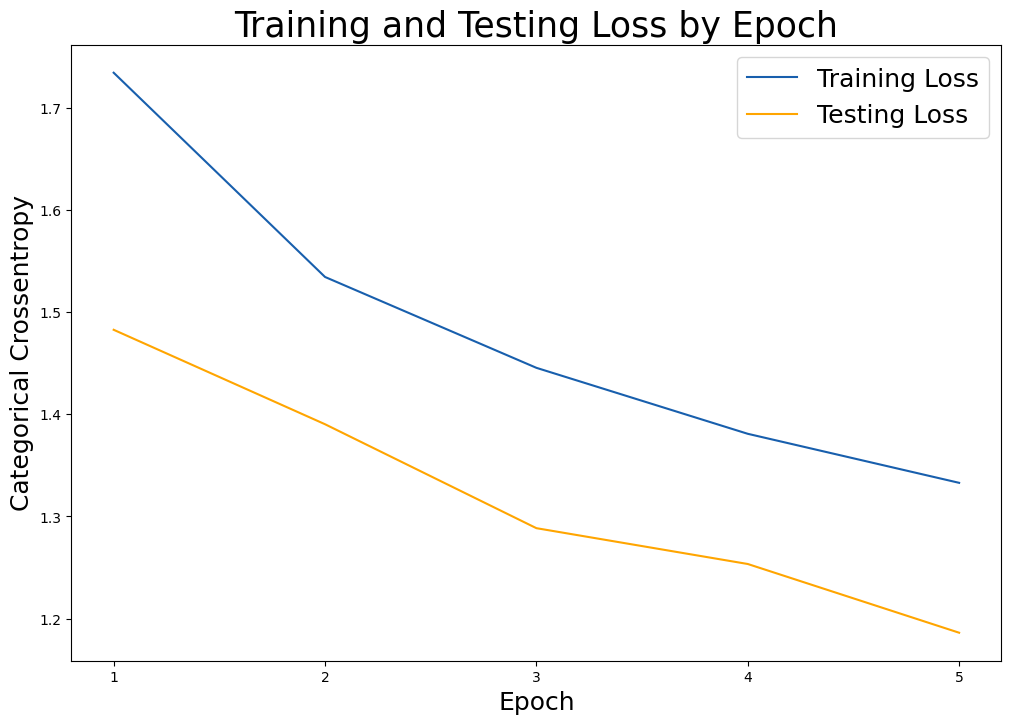

In [69]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Instantiate a new CNN model.
new_cnn_model = Sequential()

# Add a convolutional layer.
new_cnn_model.add(Conv2D(filters=6,            # number of filters
                          kernel_size=3,        # height/width of filter
                          activation='relu',   # activation function 
                          input_shape=(32,32,3)))  # shape of input (image)
new_cnn_model.add(MaxPooling2D(pool_size=(2,2)))  # dimensions of region of pooling

new_cnn_model.add(Conv2D(16,
                          kernel_size=3,
                          activation='relu'))

new_cnn_model.add(MaxPooling2D(pool_size=(2,2)))

new_cnn_model.add(Flatten())

# Add a densely-connected layer with 128 neurons.
new_cnn_model.add(Dense(128, activation='relu'))

# Add a final layer with 10 neurons.
new_cnn_model.add(Dense(10, activation='softmax'))

# Compile the new model.
new_cnn_model.compile(loss='categorical_crossentropy',
                       optimizer='adam',
                       metrics=['accuracy'])

# Fit the new model on the combined training data (original + augmented).
history_new = new_cnn_model.fit(combined_X_train,
                                 combined_y_train,
                                 batch_size=256,
                                 validation_data=(X_test, y_test),
                                 epochs=5,
                                 verbose=1)

# Check out the model summary.
new_cnn_model.summary()

# Check out the train loss and test loss over epochs.
train_loss_new = history_new.history['loss']
test_loss_new = history_new.history['val_loss']

# Set figure size for loss plot.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss_new, label='Training Loss', color='#185fad')
plt.plot(test_loss_new, label='Testing Loss', color='orange')

# Set title for loss plot.
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])

plt.legend(fontsize=18);


# b) Evaluate the model's performance on the test set and compare it to the performance of the original model you trained in question 1. Make sure you compare metrics such as classification accuracy, false positive rates and false negative rates using appropriate matrices. (10)

In [70]:
# Evaluate the new model on test data.
cnn_score_new = new_cnn_model.evaluate(X_test,
                                        y_test,
                                        verbose=1)

cnn_labels_new = new_cnn_model.metrics_names


313/313 [==============================] - 1s 3ms/step - loss: 1.1861 - accuracy: 0.5808


In [71]:
# Print FFNN model evaluation results
print(f'FFNN {labels[0]}: {score[0]}')
print(f'FFNN {labels[1]}: {score[1]}')
print()

# Print old CNN model evaluation results
print(f'CNN (old) {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN (old) {cnn_labels[1]}   : {cnn_score[1]}')
print()

# Print new CNN model evaluation results
print(f'CNN (new) {cnn_labels_new[0]}: {cnn_score_new[0]}')
print(f'CNN (new) {cnn_labels_new[1]}: {cnn_score_new[1]}')

FFNN loss: 1.6758402585983276
FFNN accuracy: 0.39480000734329224

CNN (old) loss  : 1.2666726112365723
CNN (old) accuracy   : 0.5472000241279602

CNN (new) loss: 1.1860733032226562
CNN (new) accuracy: 0.5807999968528748


# Therefore, the loss and accuracy both decreased and increased respectively for the new CNN model as compared to the old CNN model. This is likely the result of the addition of the 3 augmentation per image, where it allowed the model to train on the same data without being overfitted. 

In [72]:
y_test.shape

(10000, 10)

In [73]:
from sklearn.metrics import confusion_matrix

# Get predictions for the CNN models
cnn_model_preds = np.argmax(cnn_model.predict(X_test), axis=1)
new_cnn_model_preds = np.argmax(new_cnn_model.predict(X_test), axis=1)

cnn_model_preds = cnn_model_preds.reshape(-1, 1)
new_cnn_model_preds = new_cnn_model_preds.reshape(-1, 1)

# One-hot encode the predictions
cnn_model_preds = np_utils.to_categorical(cnn_model_preds, 10)
new_cnn_model_preds = np_utils.to_categorical(new_cnn_model_preds, 10)

# Compute confusion matrices
cnn_model_conf_matrix = confusion_matrix(y_test.argmax(axis=1), cnn_model_preds.argmax(axis=1))
new_cnn_model_conf_matrix = confusion_matrix(y_test.argmax(axis=1), new_cnn_model_preds.argmax(axis=1))

# Print confusion matrices
print("Confusion Matrix - CNN Model:")
print(cnn_model_conf_matrix)
print()

print("Confusion Matrix - New CNN Model:")
print(new_cnn_model_conf_matrix)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix - CNN Model:
[[564  14  75   7  29   3  27  13 188  80]
 [ 52 522  11   1  10   3  25   9  77 290]
 [ 75  12 423  16 157  65 127  55  31  39]
 [ 22   9 135 162 137 156 196  79  34  70]
 [ 34   1 106  16 513  33 173  73  29  22]
 [  9   3 152  56 106 414  87 115  22  36]
 [  7  11  46  14  70  15 757  25  12  43]
 [ 20   2  46  15  91  61  43 644  11  67]
 [ 70  37  18   2   9   7  21  11 757  68]
 [ 40  65  16   4   8   6  41  33  71 716]]

Confusion Matrix - New CNN Model:
[[737  42  14  14   7   9  18  15 104  40]
 [ 56 782   3   6   2   7  22  12  39  71]
 [117  34 334  44  89 118 166  57  27  14]
 [ 38  35  32 246  55 285 175  65  30  39]
 [ 57  13  58  36 455  46 170 116  30  19]
 [ 22  21  40 107  38 565  73  87  29  18]
 [ 14  22  33  23  39  29 802  12  13  13]
 [ 30  24   8  38  56  99  51 645   9  40]
 [134 104   3   8  10  13   9  15 662  42]
 [ 46 221   5  20   7  11  27  24  59 580]]


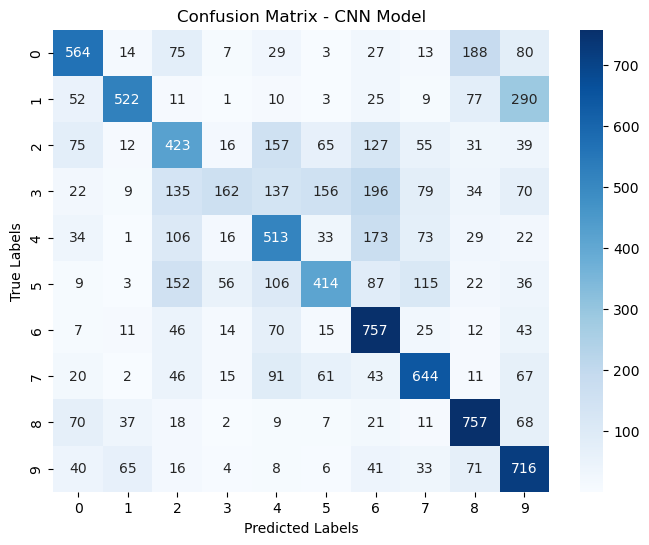

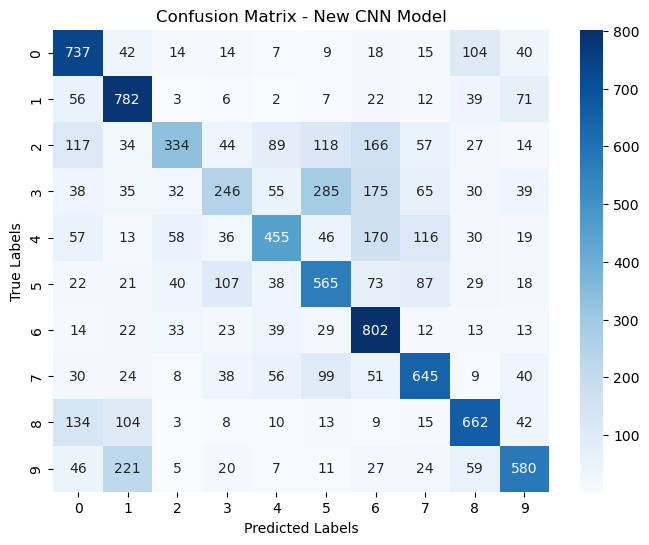

In [74]:
import seaborn as sns

# Define function to plot confusion matrix using Seaborn
def plot_confusion_matrix(conf_matrix, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrices for CNN models
plot_confusion_matrix(cnn_model_conf_matrix, 'CNN Model')
plot_confusion_matrix(new_cnn_model_conf_matrix, 'New CNN Model')

In [75]:
# Define function to calculate FPR and FNR
def calculate_rates(conf_matrix):
    FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
    TN = conf_matrix.sum() - (FP + FN + np.diag(conf_matrix))
    TP = np.diag(conf_matrix)

    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    mean_FPR = np.mean(FPR)
    mean_FNR = np.mean(FNR)

    return FPR, FNR, mean_FPR, mean_FNR

# Calculate FPR, FNR, and mean FPR, mean FNR for each model
cnn_model_FPR, cnn_model_FNR, mean_cnn_model_FPR, mean_cnn_model_FNR = calculate_rates(cnn_model_conf_matrix)
new_cnn_model_FPR, new_cnn_model_FNR, mean_new_cnn_model_FPR, mean_new_cnn_model_FNR = calculate_rates(new_cnn_model_conf_matrix)

# Print individual and mean FPR and FNR values
print(f'CNN Model - False Positive Rate: {cnn_model_FPR}')
print(f'CNN Model - False Negative Rate: {cnn_model_FNR}')
print(f'Mean FPR for CNN Model: {mean_cnn_model_FPR}')
print(f'Mean FNR for CNN Model: {mean_cnn_model_FNR}')
print()
print(f'New CNN Model - False Positive Rate: {new_cnn_model_FPR}')
print(f'New CNN Model - False Negative Rate: {new_cnn_model_FNR}')
print(f'Mean FPR for New CNN Model: {mean_new_cnn_model_FPR}')
print(f'Mean FNR for New CNN Model: {mean_new_cnn_model_FNR}')

CNN Model - False Positive Rate: [0.03655556 0.01711111 0.06722222 0.01455556 0.06855556 0.03877778
 0.08222222 0.04588889 0.05277778 0.07944444]
CNN Model - False Negative Rate: [0.436 0.478 0.577 0.838 0.487 0.586 0.243 0.356 0.243 0.284]
Mean FPR for CNN Model: 0.05031111111111112
Mean FNR for CNN Model: 0.4528

New CNN Model - False Positive Rate: [0.05711111 0.05733333 0.02177778 0.03288889 0.03366667 0.06855556
 0.079      0.04477778 0.03777778 0.03288889]
New CNN Model - False Negative Rate: [0.263 0.218 0.666 0.754 0.545 0.435 0.198 0.355 0.338 0.42 ]
Mean FPR for New CNN Model: 0.04657777777777778
Mean FNR for New CNN Model: 0.4192


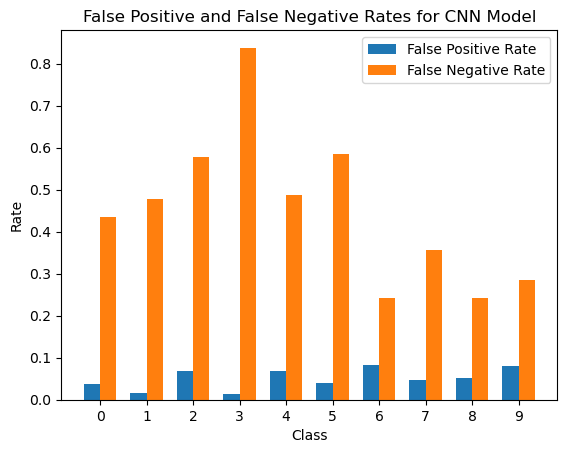

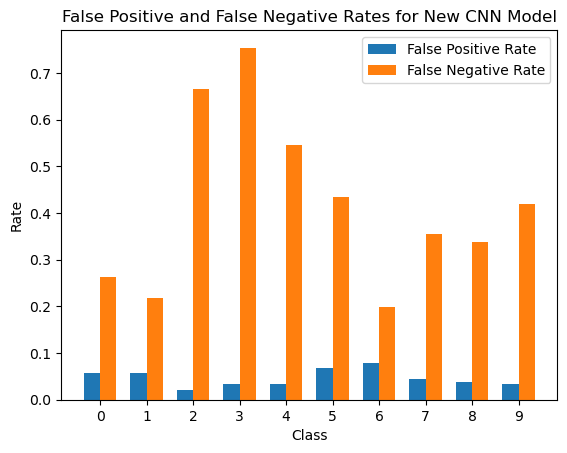

In [76]:
# Define function to plot FPR and FNR
def plot_rates(FPR, FNR, model_name):
    classes = list(range(10))  # Assuming you have 10 classes
    width = 0.35  # Bar width

    fig, ax = plt.subplots()
    rects1 = ax.bar(classes, FPR, width, label='False Positive Rate')
    rects2 = ax.bar([p + width for p in classes], FNR, width, label='False Negative Rate')

    ax.set_xlabel('Class')
    ax.set_ylabel('Rate')
    ax.set_title(f'False Positive and False Negative Rates for {model_name}')
    ax.set_xticks([p + width / 2 for p in classes])
    ax.set_xticklabels(classes)
    ax.legend()

    plt.show()

# Plot FPR and FNR for CNN Model
plot_rates(cnn_model_FPR, cnn_model_FNR, 'CNN Model')

# Plot FPR and FNR for New CNN Model
plot_rates(new_cnn_model_FPR, new_cnn_model_FNR, 'New CNN Model')

# Therefore, the confusion matrix and computed false negative and false positive rates tells us that the new CNN model that was trained on the augmented data has a slight advantage in terms of performance over the old CNN model. 
# Furthermore, it seems that for both models - class 3 (cats) has a relatively high false negative rate as compared to class 6 (frogs).
# Lastly, exploring a higher amount of augmentations per image (3->10?) seems to be a promising step forward to possible effects of overfitting or diminishing returns from this method of data augmentation. However, this comes with higher required computing resources/time.